In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

In [2]:
url = 'https://media.geeksforgeeks.org/wp-content/uploads/20240320114716/data_for_lr.csv'
data = pd.read_csv(url)


In [3]:
data.head(2)

,x,y
0,24.0,21.549452
1,50.0,47.464463


In [4]:
data = data.dropna()

In [5]:
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)

test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.y[500:700]).reshape(199,1)

In [24]:
class LinearRegression:
    def __init__(self):
        self.parameters = {}

    def forward_propagation(self, train_input):
        m = self.parameters['m']
        c = self.parameters['c']
        predictions = np.multiply(m, train_input) + c
        return predictions

    def cost_function(self, predictions, train_output):
        cost = np.mean((train_output - predictions)**2)
        return cost

    def backward_propagation(self, train_input, train_output, predictions):
        derivatives = {}
        df = (predictions - train_output)
        dm = 2 * np.mean(np.multiply(train_input, df))
        dc = 2 * np.mean(df)

        derivatives['dm'] = dm
        derivatives['dc'] = dc

        return derivatives

    def update_parameters(self, derivatives, learning_rate):
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

    def train(self, train_input, train_output, learning_rate, iters):
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1

        self.loss = []

        fig, ax = plt.subplots()
        x_vals = np.linspace(min(train_input), max(train_input), 100)
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals + self.parameters['c'], color = 'red', label='Regression Line')
        ax.scatter(train_input, train_output, marker='o', color='green', label='Training Data')

        ax.set_ylim(0, max(train_output) + 1)

        def update(frame):

            predictions = self.forward_propagation(train_input)
            cost = self.cost_function(predictions, train_input)

            derivatives = self.backward_propagation(train_input, train_output, predictions)

            self.update_parameters(derivatives, learning_rate)

            line.set_ydata(self.parameters['m'] * x_vals + self.parameters['c'])

            self.loss.append(cost)
            print("Iteration = {}, Loss = {}".format(frame+1, cost))

            return line,

        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True)
        ani.save('linear_regression_A.gif', writer='ffmpeg')


        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.title('Linear Regression')
        plt.legend()
        plt.show()

        return self.parameters, self.loss

MovieWriter ffmpeg unavailable; using Pillow instead.


Iteration = 1, Loss = 4681.343820092313
Iteration = 1, Loss = 568.7243990763751
Iteration = 1, Loss = 70.13752775772042
Iteration = 1, Loss = 9.020846073299047
Iteration = 2, Loss = 1.2975259845591995
Iteration = 3, Loss = 0.2424705615616873
Iteration = 4, Loss = 0.07217079802624211
Iteration = 5, Loss = 0.036667179698262005
Iteration = 6, Loss = 0.027188289482785285
Iteration = 7, Loss = 0.024240870741924367
Iteration = 8, Loss = 0.02325920109052938
Iteration = 9, Loss = 0.022923585189683293
Iteration = 10, Loss = 0.02280786424200979
Iteration = 11, Loss = 0.022767951230160045
Iteration = 12, Loss = 0.022754291095258693
Iteration = 13, Loss = 0.022749736909798
Iteration = 14, Loss = 0.022748342915951427
Iteration = 15, Loss = 0.02274804587564467
Iteration = 16, Loss = 0.022748129640350463
Iteration = 17, Loss = 0.02274834561321903
Iteration = 18, Loss = 0.022748607496075445
Iteration = 19, Loss = 0.022748885330953372
Iteration = 20, Loss = 0.02274916871806533


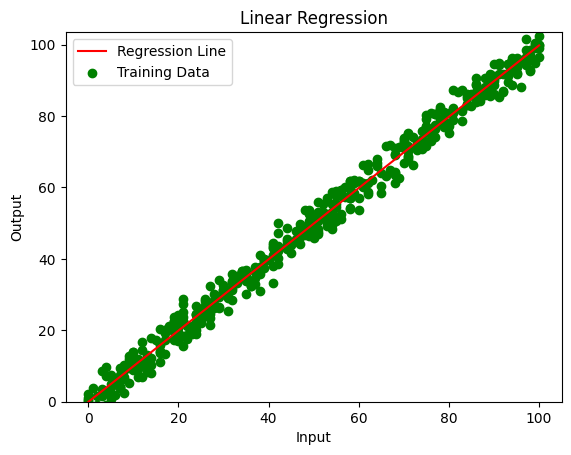

In [25]:
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)